In the previous notebook, we developed a function to generate atom maps for a given `bcs.Cluster` object. These atom maps tell us how the atoms within acyl-CoA substrates are transformed and by which module as these acyl-CoA units move down an assembly line. Here, we have added the atom mapping function developed previously as a formal method within the `bcs.Cluster` class and will go through a couple more examples to visualize these atom maps.

In [8]:
from retrotide import retrotide, structureDB

In [9]:
import bcs

In [10]:
from rdkit import Chem
from rdkit.Chem import rdFMCS, Draw
from typing import List

In [11]:
loading_AT_domain = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: loading_AT_domain}, loading = True)

AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA")
module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1}, loading = False)

AT_domain_mod2 = bcs.AT(active = True, substrate = "Malonyl-CoA")
module2 = bcs.Module(domains = {bcs.AT: AT_domain_mod2}, loading = False)

AT_domain_mod3 = bcs.AT(active = True, substrate = "Malonyl-CoA")
module3 = bcs.Module(domains = {bcs.AT: AT_domain_mod3}, loading = False)

cluster = bcs.Cluster(modules = [loading_module, module1, module2, module3])

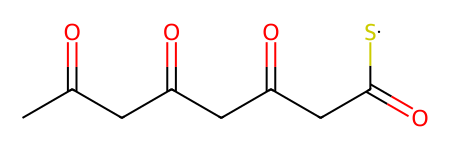

In [12]:
cluster.computeProduct(structureDB)

In [13]:
atom_mapped_mols_list = cluster.get_atom_mapping(structureDB)

The method `.visualize_atom_maps` has also been added to the `bcs.Cluster` class so we can now call upon this method to visualize how the atoms in this PKS are transformed across all modules. Within the first module, 

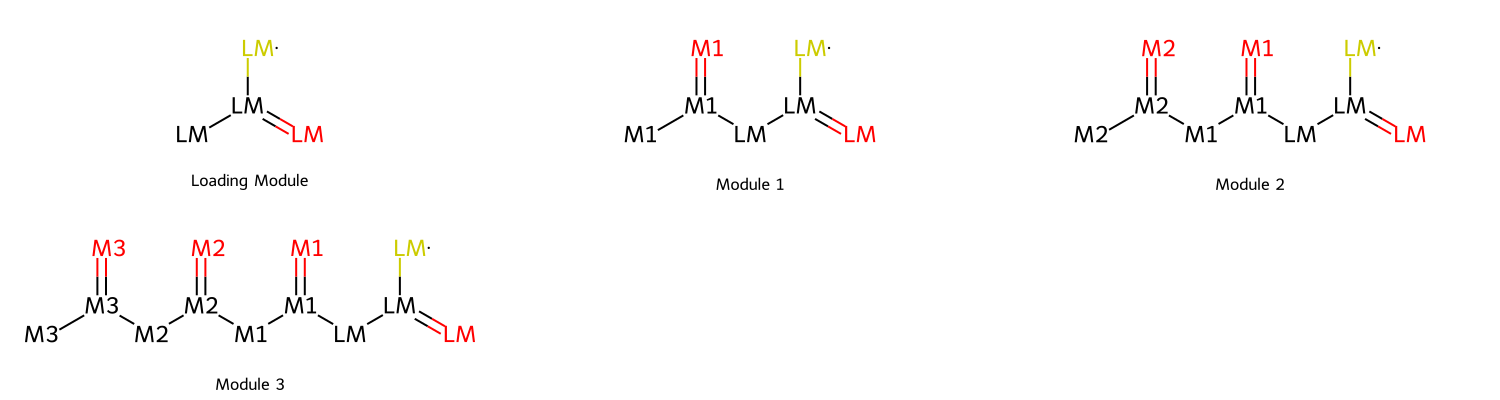

In [14]:
cluster.visualize_atom_maps(atom_mapped_mols_list)